# Walking Example (p135)

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://pyagrum.gitlab.io) |[ ![interactive online version](images/atbinder.svg)](https://mybinder.org/v2/gl/agrumery%2FaGrUM/forBinder?urlpath=%2Fdoc%2Ftree%2Fwrappers%2Fpyagrum%2Fdoc%2Fsphinx%2Fnotebooks%2FBoW-c4p135-walkingExample.ipynb)

Authors: <b>Aymen Merrouche</b> and Pierre-Henri Wuillemin.

**This notebook follows the example from "The Book Of Why" (Pearl, 2018) chapter 4 page135**

## Confounding

In [1]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb
import pyagrum.causal as csl
import pyagrum.causal.notebook as cslnb

> In 1998 a study unveiled a correlation between physical exercise and longevity among nonsmoking retired men. Of course what we want to know is whether men who exercise more live longer, suggesting a causal relationship. Study measurements are to be found at the end of this notebook.

### corresponding causal diagram
The corresponding causal diagram is the following:

In [2]:
# We create the causal diagram
we = gum.fastBN("Walking{casual|normal|intense}->Mortality{dead|alive}")

# We fill the CPTs
we.cpt("Walking")[:] = [151 / 707, 379 / 707, 177 / 707]
we.cpt("Mortality")[{"Walking": "casual"}] = [0.43, 0.57]
we.cpt("Mortality")[{"Walking": "intense"}] = [0.215, 0.785]
we.cpt("Mortality")[{"Walking": "normal"}] = [0.277, 0.723]

gnb.sideBySide(
  we,
  we.cpt("Walking") * we.cpt("Mortality"),
  we.cpt("Walking"),
  we.cpt("Mortality"),
  captions=["the BN", "the joint distribution", "the marginal for $Walking$", "the CPT for $Mortality$"],
)

> The study showed that after 12 years, 43% of casual walkers died while only 21,5% of intense walkers died.

## Causal effect of walking on mortality in this model:

In [3]:
weModele = csl.CausalModel(we)
cslnb.showCausalImpact(weModele, "Mortality", doing="Walking", values={})

> Before jumping to any conclusions, we should consider the presence of possible confounders. We need to ask the following question: <b>what characterizes intense walkers from casual walkers? </b><br>
Without abandoning the idea of a possible cause-and-effect relationship between walking and mortality, we introduce a third variable, a "confounder", a common cause of the two variables that could explain the correlation that exists between them. Our aim is to distinguish between the causal effect of walking on mortality (if there is a cause and effect relationship) the bias induced by this third variable. For this purpose, we need to adjust for it. 

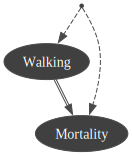

In [4]:
weModele1 = csl.CausalModel(we, [("confounder", ["Walking", "Mortality"])], True)
gnb.show(weModele1)

In [5]:
cslnb.showCausalImpact(weModele1, "Mortality", "Walking", values={"Walking": "intense"})

## Introducing age as a confounder:

> We want to measure the causal effect of walking on mortality, the introduction of a confounding bias occurs when a third variable called "confounding variable" influences both walking and mortality. <br>
An obvious confounder is <b>age</b>, younger subjects exercise more and have more time to live! (there are other confounders)

### Let's use fictitious data:

In [6]:
wea = gum.fastBN("Age{cat1|cat2|cat3}->Walking{casual|normal|intense}->Mortality{dead|alive}<-Age{cat1|cat2|cat3}")

gnb.sideBySide(
  wea,
  wea.cpt("Age"),
  wea.cpt("Walking"),
  wea.cpt("Mortality"),
  captions=["the BN", "the marginal for $Age$", "the CPT for $Walking$", "the CPT for $Mortality$"],
)

## Causal effect of walking on mortality with age as a confounder:

In [7]:
weModele2 = csl.CausalModel(wea)
cslnb.showCausalImpact(weModele2, "Mortality", "Walking", values={})

> We adjusted for Age using the back-door criterion (Age blocks all back-door paths from Walking to Mortality, setting Walking=
"intense" or conditioning on Walking="intense" has the same effect on Mortality)

## Conclusion:

> After adjusting for age, we obtain that 40.5% (43% unadjusted) of casual walkers died, whereas only 23.8% (21,5% unadjusted) of intense walkers died. The correlation induced by Age between the two variables is negligible. <br>
Even after adjusting for all plausible confounders, after getting rid of all confounding bias, Walking is still associated to Mortality. Unless we missed any other confounders, <b> in which case the remaining uncertainty is proportional to the correlation induced by these hidden variables, </b>we can say that intentional walking prolongs life among the studied population.

> <b>In an observational study, adjusting for confounding factors is systematic in order to measure the causal effect of a treatment on an outcome.</b>

## Study measurements both unadjusted and age-adjusted: 

![title](images/WalkingExampleInfo.jpeg)